## Project Case Scenario

Project Scenario: You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

Is there a significant difference in the median value of houses bounded by the Charles river or not?

Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

Using the appropriate graphs and charts, generate basic statistics and visualizations that you think will be useful for the upper management to give them important insight given the question they are asking, in your graphs, include an explanation of each statistic. 

Project Tasks:

Task 1: Familiarize yourself with the dataset 

Task 2: (Optional) If you do not already have an instance of Watson Studio, create an IBM Cloud Lite account and provision an instance of Waston Studio.

Task 3: Load the dataset in a Jupyter Notebook using Watson Studio.

Task 4: Generate basic statistics and visualizations for upper management. 

Task 5: Use the appropriate tests to answer the questions provided.

Task 6: Share your Jupyter Notebook.

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

## Task 3: Load in the Dataset in your Jupyter Notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import scipy.stats

In [4]:
boston_url= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df= pd.read_csv(boston_url)

boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## Task 4: Generate Descriptive Statistics and Visualizations

### For the "Median value of owner-occupied homes" provide a boxplot?

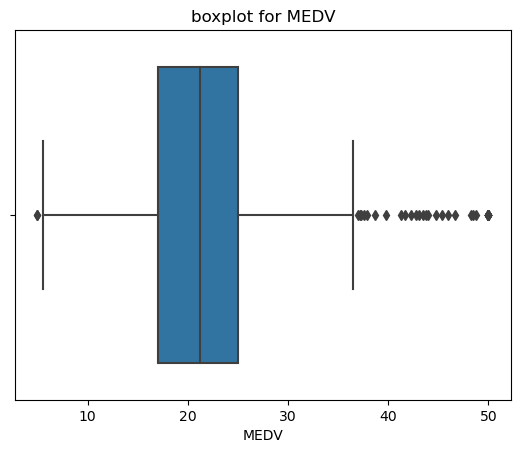

In [10]:
sns.boxplot(x= boston_df.MEDV)

plt.title("boxplot for MEDV")
plt.show()

### Provide a  bar plot for the Charles river variable

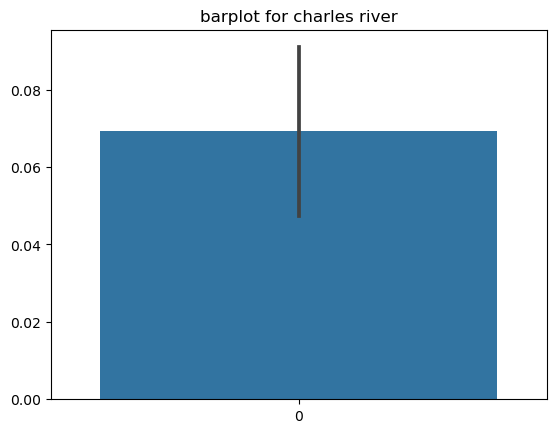

In [11]:
sns.barplot(data= boston_df.CHAS)
plt.title("barplot for charles river")
plt.show()

### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

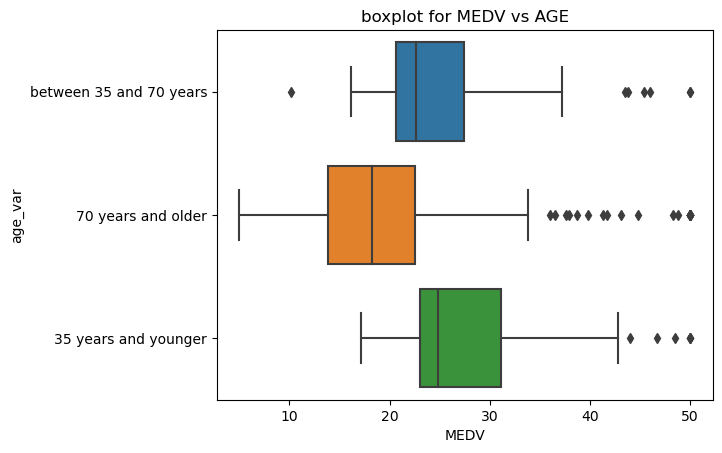

In [13]:
boston_df.loc[(boston_df["AGE"] <= 35),'age_var'] = '35 years and younger'
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"] < 70),'age_var'] = 'between 35 and 70 years'
boston_df.loc[(boston_df["AGE"] >= 70),'age_var'] = '70 years and older'

sns.boxplot(x= boston_df.MEDV, y= boston_df.age_var, data= boston_df)
plt.title("boxplot for MEDV vs AGE")
plt.show()

### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Text(0.5, 1.0, 'scatterplot for Nitric oxide NOX and non-retail business INDUS')

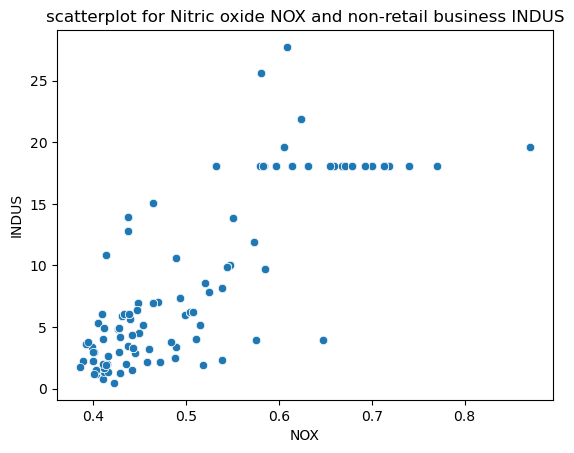

In [14]:
sns.scatterplot(x= boston_df.NOX, y= boston_df.INDUS, data= boston_df)
plt.title("scatterplot for Nitric oxide NOX and non-retail business INDUS")

there is a linear correlation up to NOX= 0.6 and INDUS= 18

### Create a histogram for the pupil to teacher ratio variable?

/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


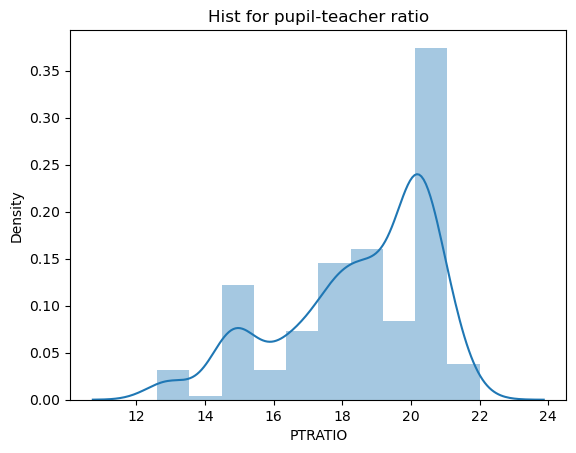

In [22]:
sns.distplot(a= boston_df.PTRATIO, bins= 10)
plt.title("Hist for pupil-teacher ratio")
plt.show()

## Task 5: Use the appropriate tests

Be sure to:
State your hypothesis.
Use α = 0.05
Perform the test Statistics.
State the conclusion from the test.

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

null hypothesis: no difference between mean values of houses and Charles river in terms of median values

In [26]:
boston_df['CHAS'].unique()

array([0., 1.])

In [25]:
scipy.stats.ttest_ind(boston_df[boston_df["CHAS"] == 0]["MEDV"], 
                      boston_df[boston_df["CHAS"] == 1]["MEDV"], axis=0, equal_var=True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

since p < 0.05, we reject null hypothesis and there is significant difference

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [27]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_var
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


null hypothesis: no difference between median value of for 3 different age groups

In [29]:
f_stat, p_val = scipy.stats.f_oneway(boston_df[boston_df["age_var"] == '35 years and younger']["MEDV"],
                                     boston_df[boston_df["age_var"] == 'between 35 and 70 years']["MEDV"],
                                     boston_df[boston_df["age_var"] == '70 years and older']["MEDV"], axis=0)
print("F-Stat={0}, p-val={1}".format(f_stat,p_val))

F-Stat=36.40764999196599, p-val=1.7105011022702984e-15


p val < 0.05 so we reject null hypothesis, so at least one of their mean is differ

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

null hypothesis: no correlation between nitric and non-retail

In [30]:
pearson, p_value = scipy.stats.pearsonr(boston_df["NOX"],boston_df["INDUS"])
print("F-Stat={0}, p-val={1}".format(pearson, p_val))

F-Stat=0.7636514469209151, p-val=1.7105011022702984e-15


p val < 0.05 so we reject null hypothesis, so there is a correlation between nitric and non-retail

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

null hypothesis: median values of weighted distance to the five Boston employment centres are not related or no effect

In [32]:
y = boston_df['MEDV']
x = boston_df['DIS']
x = sm.add_constant(x)

results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 06 May 2023   Prob (F-statistic):           1.21e-08
Time:                        19:54:51   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

p-val < 0.05 sowe reject null hypothesis so there is a correlation between variables however R² is 0.062 which is low correlation